<a href="https://colab.research.google.com/github/edersonbadeca/FASE-04-CTWP-Cap11/blob/main/src/FASE_04_CTWP_Cap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib scikit-learn seaborn > /dev/null 2>&1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
colunas = ['Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo', 'Largura_Nucleo', 'Assimetria', 'Comprimento_Sulco', 'Classe']
df = pd.read_csv(url, sep='\t+', engine='python', names=colunas)
df.head()

,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Assimetria,Comprimento_Sulco,Classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.describe()

,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Assimetria,Comprimento_Sulco,Classe
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


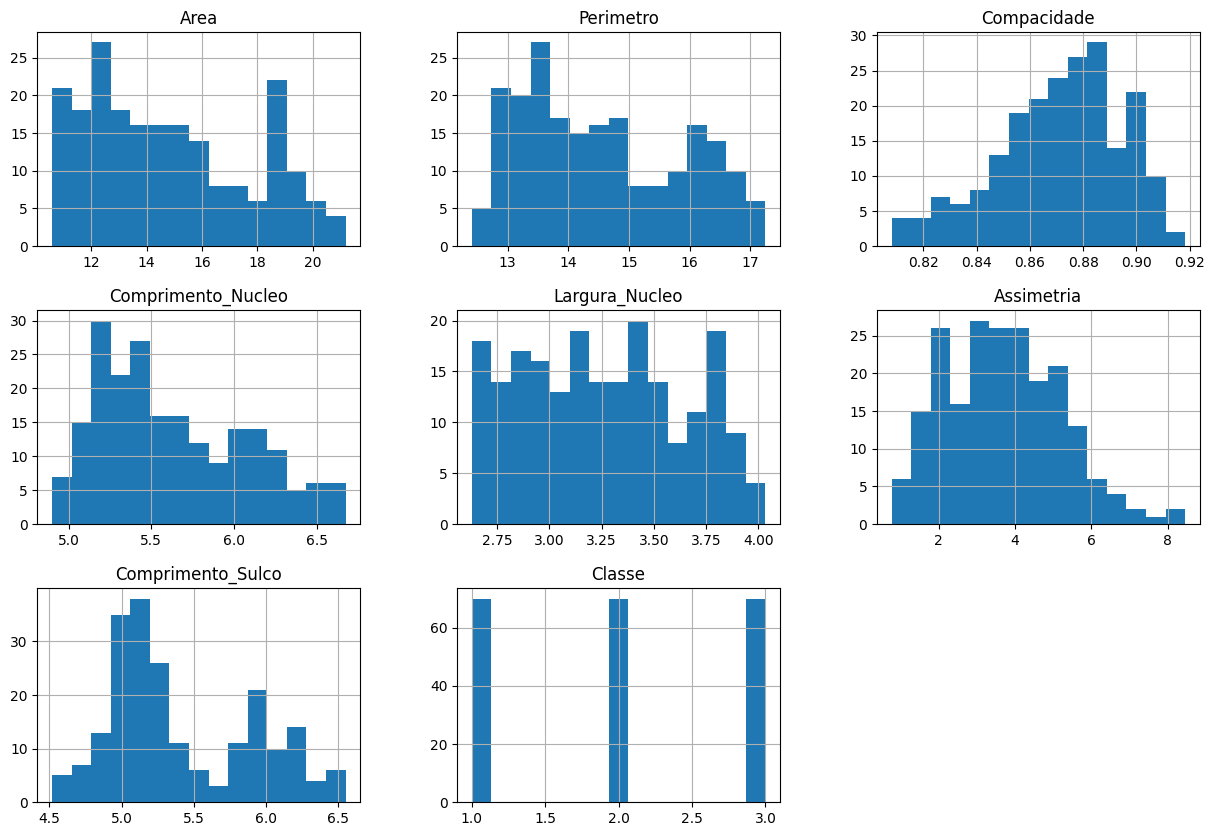

In [ ]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

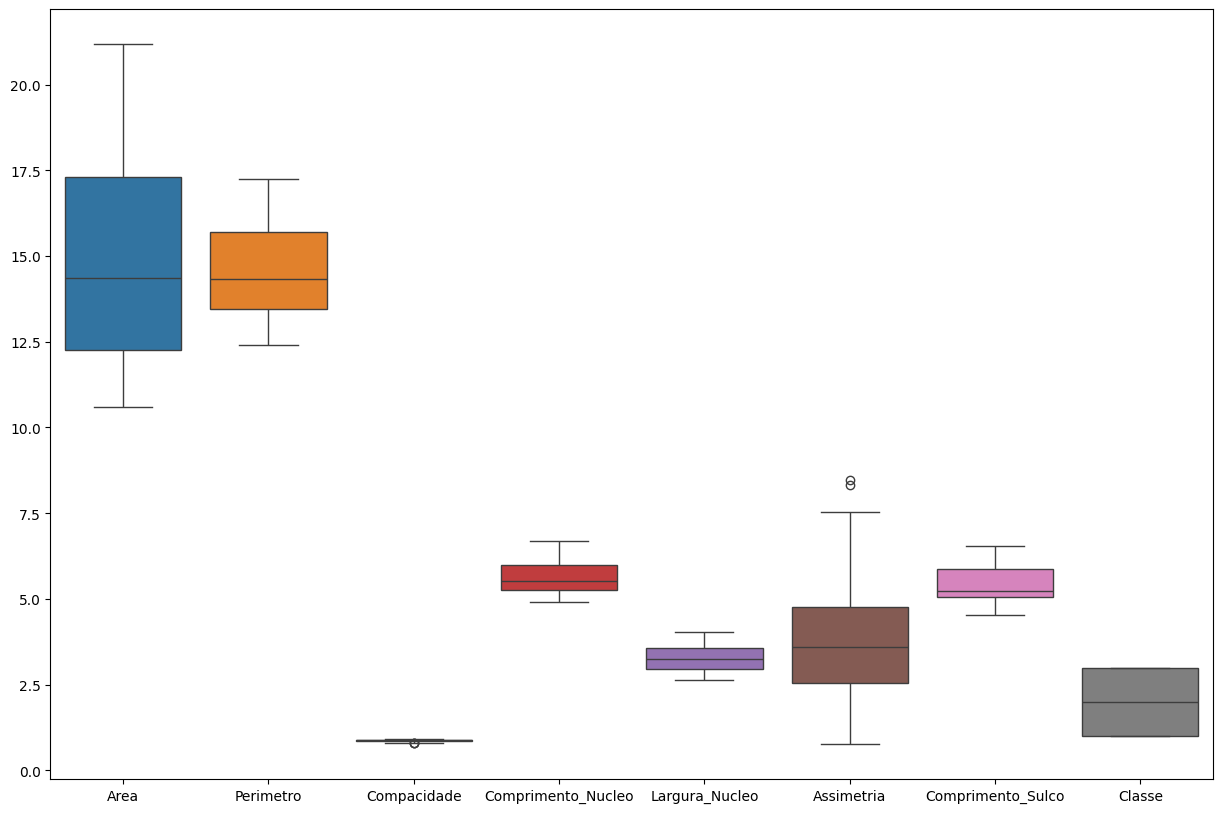

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

# Possíveis relações entre as características

<Figure size 1500x1000 with 0 Axes>

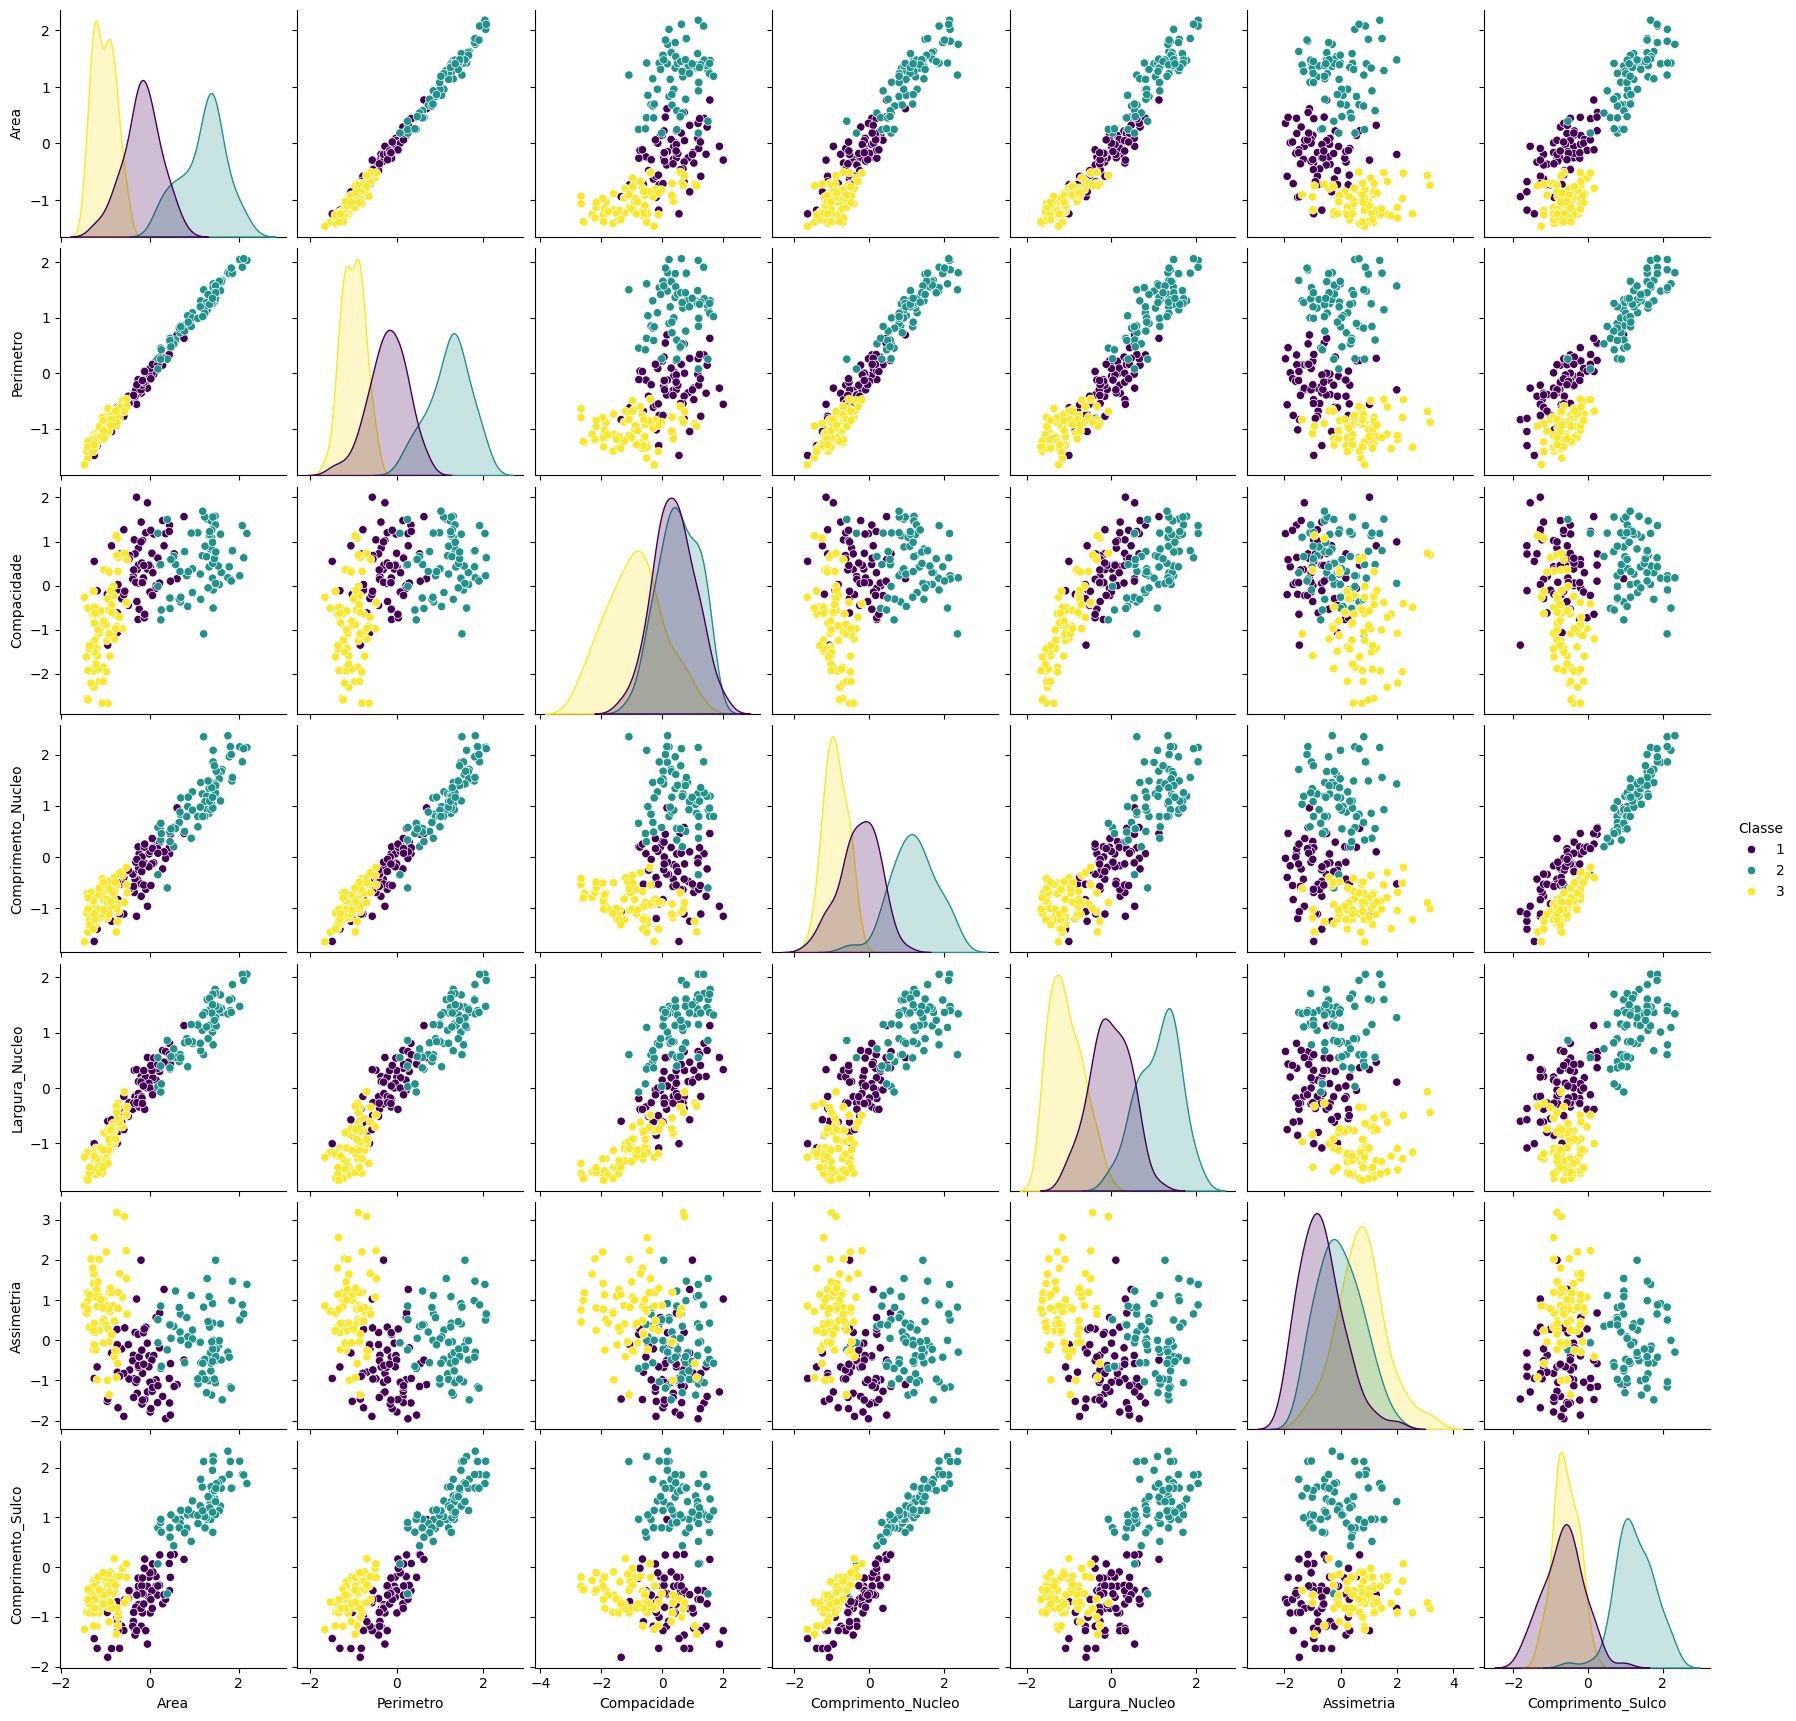

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='Classe', palette='viridis', diag_kind='kde')
plt.show()

# Identificação e tratamento de valores ausentes

In [ ]:
df.isnull().sum() # Neste dataset não há, mas vamos deixar o tratamento com a a média caso no futuro o ds seja atualizado

df.fillna(df.mean(), inplace=True)


# Para este dataset, vamos optar por aplicar a padronização, porque é um dataset pequeno, desta forma garantimos que os dados tenham a média 0 com desvio 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
### Filtramos a coluna target (Classe) porque essa coluna representa
### as variaveis de saida, que são as classes dos grãos
atributos = df.columns[:-1]
df[atributos] = scaler.fit_transform(df[atributos])
df.head()

,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Assimetria,Comprimento_Sulco,Classe
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


# Algoritimos de classificação - Separando os dados para teste

> Adicionar aspas



In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['Classe']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# Treinamento e avaliação dos modelos com os algoritimos KNN, SVM, Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelos = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"Modelo: {nome}")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred)}")
    print(f"Matriz de Confusão:\n{confusion_matrix(y_test, y_pred)}\n")

Modelo: KNN
Acurácia: 0.88
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       1.00      1.00      1.00        14
           3       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

Matriz de Confusão:
[[ 9  0  2]
 [ 0 14  0]
 [ 3  0 14]]

Modelo: SVM
Acurácia: 0.90
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       1.00      1.00      1.00        14
           3       0.93      0.82      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

Matriz de Confusão:
[[10  0  1]
 [ 0 14  0]
 [ 3  0 14]]

Modelo: Rand

# Otimização Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
print("Acurácia após otimização:", grid_rf.best_score_)

Melhores parâmetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia após otimização: 0.9347593582887701


# Otimização para o KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_search.best_params_)
print("Acurácia após otimização:", grid_search.best_score_)

Melhores parâmetros para KNN: {'n_neighbors': 5}
Acurácia após otimização: 0.9404634581105169


# Otimização para SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros para SVM:", grid_search.best_params_)

Melhores parâmetros para SVM: {'C': 100, 'gamma': 0.001}


# Analisando a matrix de confunsão


In [ ]:
import seaborn as sns
pred_knn = grid_search.predict(X_test)
pred_svm = grid_search.predict(X_test)
pred_rf = grid_rf.predict(X_test)

cm_knn = confusion_matrix(y_test, pred_knn)
cm_svm = confusion_matrix(y_test, pred_svm)
cm_rf = confusion_matrix(y_test, pred_rf)

# Matrix do  modelo KNN otimizado

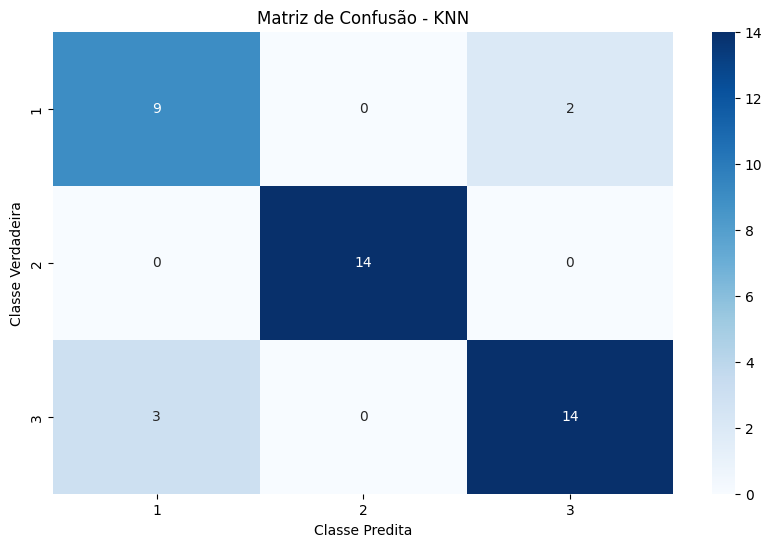

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=df['Classe'].unique(), yticklabels=df['Classe'].unique())
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

# matrix de confusão para o modelo SVM

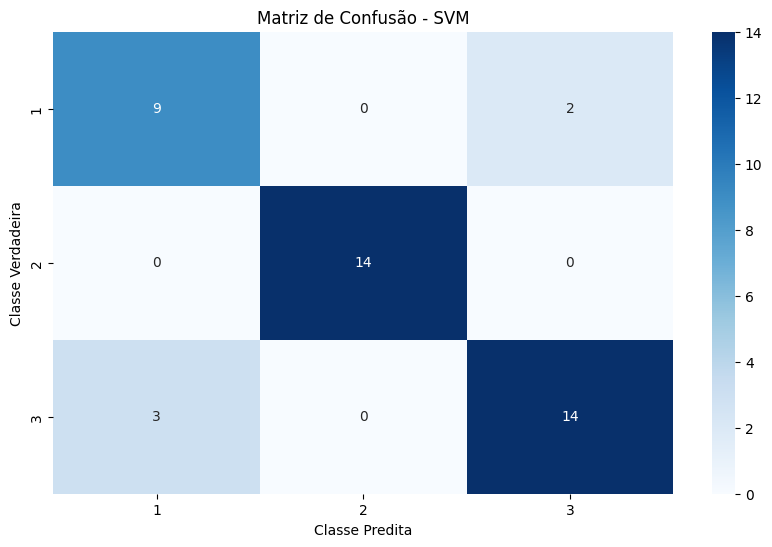

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Classe'].unique(), yticklabels=df['Classe'].unique())
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

# Matrix de confusão para o Random Forest


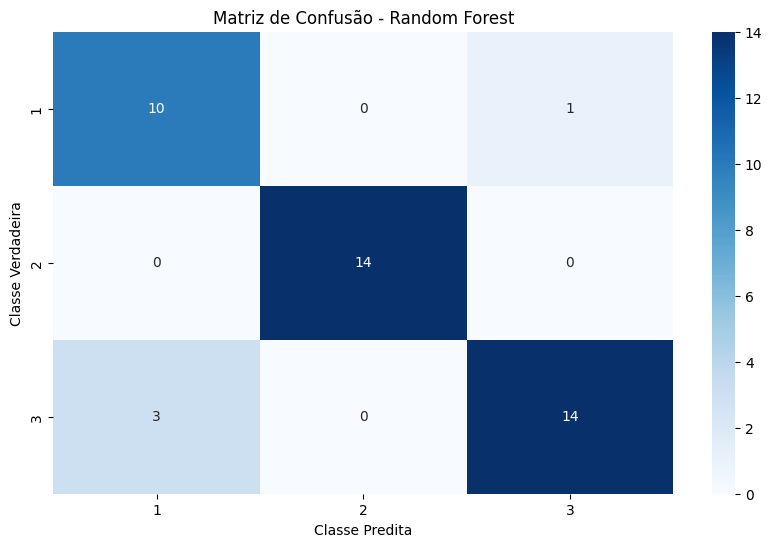

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=df['Classe'].unique(), yticklabels=df['Classe'].unique())
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()